In [87]:
# Database Interaction and Data Manipulation in Python
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path Configuration for Custom Module Imports
# -----------------------------------------------------------------------
import sys
sys.path.append('../')  # Adds the parent directory to the path for custom module imports

# Importing Custom Functions
from src.support_db import sql_query
from src.support_queries import *

# Suppressing Warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

### Driver of the Day Analysis

Let's show how many times each driver was selected as "Driver of the Day" throughout the 2023 season. This analysis provides insight into which drivers were perceived as outstanding by fans in individual races, highlighting popularity and notable performances.

In [39]:
df_1 = pd.DataFrame(sql_query(query_1))
df_1.columns = ['driver', 'times_chosen']

Query performed successfully.
Database connection closed.


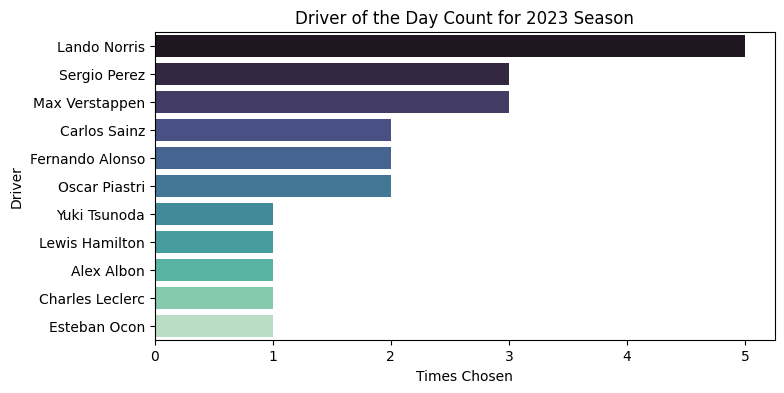

In [43]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='times_chosen', 
    y='driver', 
    data=df_1, 
    palette='mako'
)
plt.xlabel('Times Chosen')
plt.ylabel('Driver')
plt.title('Driver of the Day Count for 2023 Season')
plt.show()

`Lando Norris` is a very popular driver that managed to secure 5 awards for his performance.

`Sergio Perez`and `Max Verstappen` earned 2 awards each, not surprising provided they were P2 and P1 in driver's championship

### Drivers Championship Standings
Total points accumulated by each driver during the season and ranks them from highest to lowest. It gives a clear overview of the final championship standings, indicating the most successful drivers.

As mentioned before, `Max Verstappen` and `Sergio Perez` got the front row of the championship.

In [8]:
df_2 = pd.DataFrame(sql_query(query_2))
df_2.columns = ['Driver', 'total_points']

Query performed successfully.
Database connection closed.


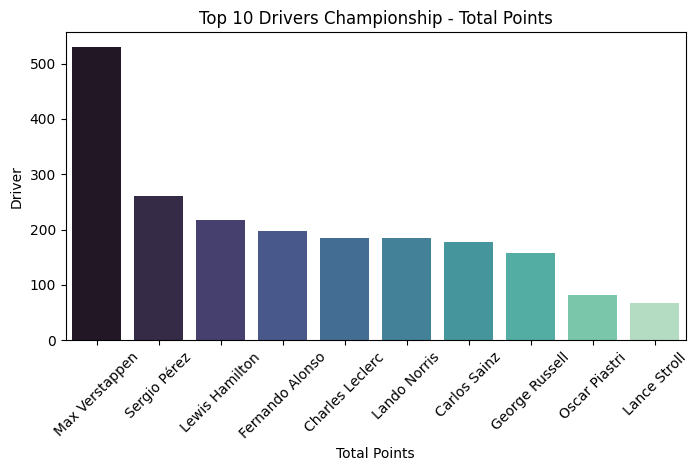

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(
    y='total_points', 
    x='Driver', 
    data=df_2, 
    palette='mako'
)
plt.xlabel('Total Points')
plt.xticks(rotation=45)
plt.ylabel('Driver')
plt.title('Top 10 Drivers Championship - Total Points')
plt.show()

### Constructors Championship Standings
Points accumulated by each constructor over the season, displaying the overall performance and ranking of the teams. It helps understand which teams were most competitive and consistent throughout the year.

In [10]:
df_3 = pd.DataFrame(sql_query(query_3))
df_3.columns = ['Constructor', 'total_points']

Query performed successfully.
Database connection closed.


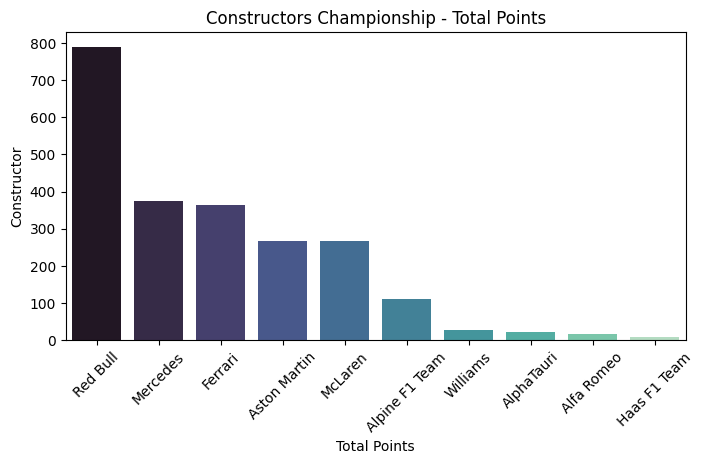

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(
    y='total_points', 
    x='Constructor', 
    data=df_3, 
    palette='mako'
)
plt.xlabel('Total Points')
plt.xticks(rotation=45)
plt.ylabel('Constructor')
plt.title('Constructors Championship - Total Points')
plt.show()

A stagering dominance by Red Bull combining `Max Verstappen` and `Sergio Perez` results for the austrian team. More equality between `Mercedes`- `Ferrari` and `Aston Martin`- `McLaren`.

### Individual Driver Results (`Fernando Alonso`)
Positions obtained by `Fernando Alonso` in each race of the 2023 season. We could focus on other drivers for future analysis.

In [13]:
df_4 = pd.DataFrame(sql_query(query_4))
df_4.columns = ['Race Name', 'Position']

Query performed successfully.
Database connection closed.


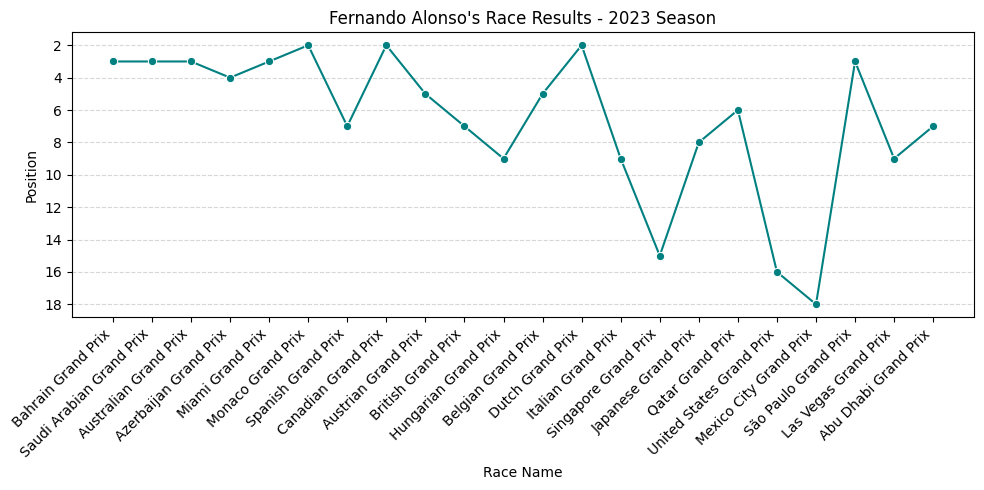

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    x='Race Name', 
    y='Position', 
    data=df_4, 
    marker='o', 
    color='teal'
)
plt.xlabel('Race Name')
plt.ylabel('Position')
plt.title('Fernando Alonso\'s Race Results - 2023 Season')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las mejores posiciones estén arriba
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


It's clear `Alonso`'s performance was very high at the begining with a sudden drop after `Canadian Grand Prix` with some surprising comebacks such as `Dutch GP` and `Sao Paulo GP`podiums.

`Aston Martin` (`Alonso`'s team) performance was excellent in the beggining but evolved inconsistently through the season

### Starting vs. Finishing Positions (Race 2023_1: `Bahrain GP`)
Starting grid position, finishing position, and positions gained for each driver in the first race of the season.  We could focus on other races for future analysis.

In [15]:
df_5 = pd.DataFrame(sql_query(query_5))
df_5.columns = ['Driver', 'GridPosition', 'EndPosition', 'PositionsGained']

Query performed successfully.
Database connection closed.


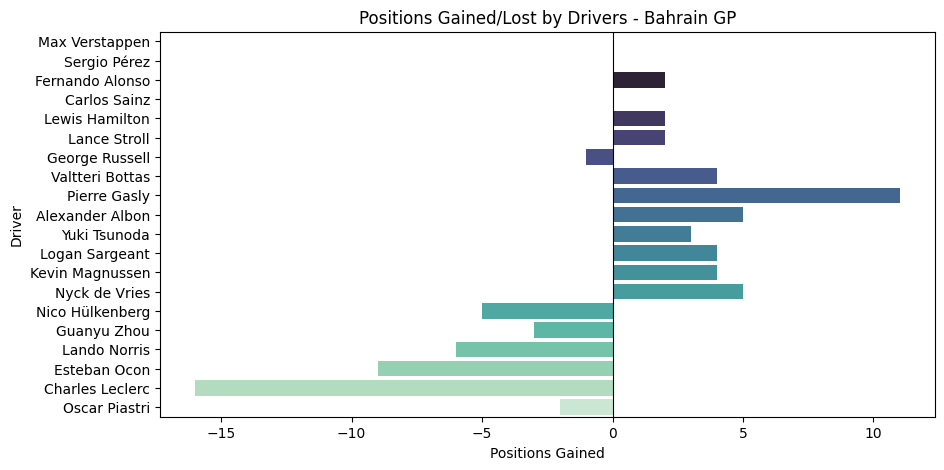

In [59]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='PositionsGained', 
    y='Driver', 
    data=df_5, 
    palette='mako'
)
plt.xlabel('Positions Gained')
plt.ylabel('Driver')
plt.title('Positions Gained/Lost by Drivers - Bahrain GP')
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en 0 para separar ganancias de pérdidas
plt.show()


### Number of DNFs (Did Not Finish)
Number of races each driver did not finish due to various reasons (mechanical failures, accidents, etc.). It provides an overview of reliability and highlights potential weaknesses in a driver's or team's season.

Warning: Lapped cars count as DNF even if they finish the race. This considers DNF as not completing all laps.

In [17]:
df_6 = pd.DataFrame(sql_query(query_6))
df_6.columns = ['Driver', 'dnf_count']

Query performed successfully.
Database connection closed.


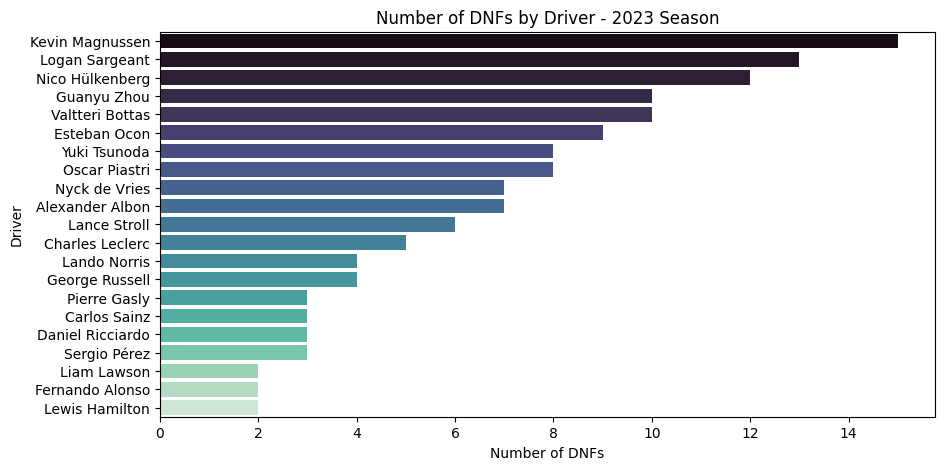

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='dnf_count', 
    y='Driver', 
    data=df_6, 
    palette='mako'
)
plt.xlabel('Number of DNFs')
plt.ylabel('Driver')
plt.title('Number of DNFs by Driver - 2023 Season')
plt.show()


We can see `Kevin Magnussen`and `Logan Sargeant`usually don't finish the race (at least on leader lap). This shows the poor performance of their cars.

Notice `Max Verstappen`doesn't even appear since he finished all races.

### Average Points per Race
Average points scored by each driver per race, giving insight into their consistency and scoring ability.

In [ ]:
df_7 = pd.DataFrame(sql_query(query_7))
df_7.columns = ['Driver', 'avg_points']

Query performed successfully.
Database connection closed.


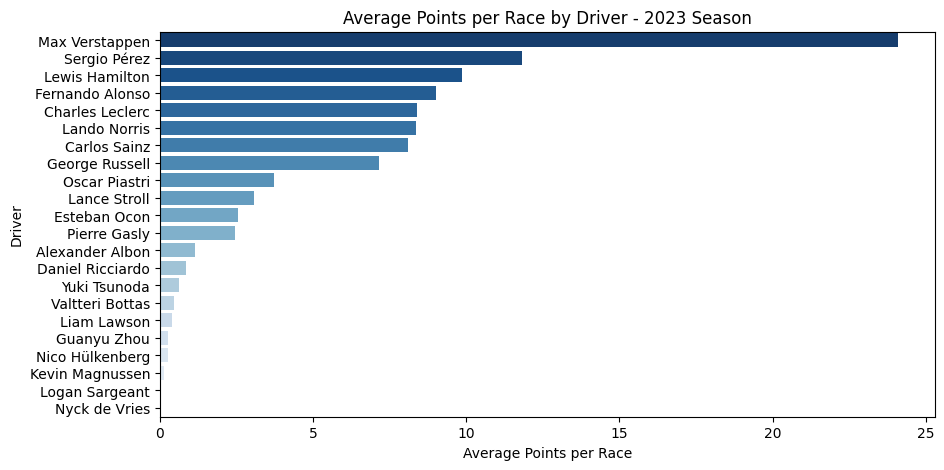

In [82]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='avg_points', 
    y='Driver', 
    data=df_7, 
    palette='Blues_r'
)
plt.xlabel('Average Points per Race')
plt.ylabel('Driver')
plt.title('Average Points per Race by Driver - 2023 Season')
plt.show()


`Max Verstappen` managed to get almost all possible point (max per race is 26, win + fastest lap) proving he had not only the best car but his talent.

### Number of Wins
How many times each driver won a race during the season.

In [22]:
df_8 = pd.DataFrame(sql_query(query_8))
df_8.columns = ['Driver', 'wins']

Query performed successfully.
Database connection closed.


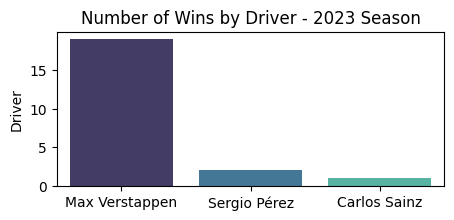

In [66]:
plt.figure(figsize=(5, 2))
sns.barplot(
    y='wins', 
    x='Driver', 
    data=df_8, 
    palette='mako'
)
plt.xlabel('')
plt.ylabel('Driver')
plt.title('Number of Wins by Driver - 2023 Season')
plt.show()


Another prove of `Max Verstappen`'s talent. `Carlos Sainz`win stands out as a sole non-`Red Bull`win of the season

### Number of Podiums
Number of times each driver finished in the top three positions.

In [24]:
df_9 = pd.DataFrame(sql_query(query_9))
df_9.columns = ['Driver', 'podiums']

Query performed successfully.
Database connection closed.


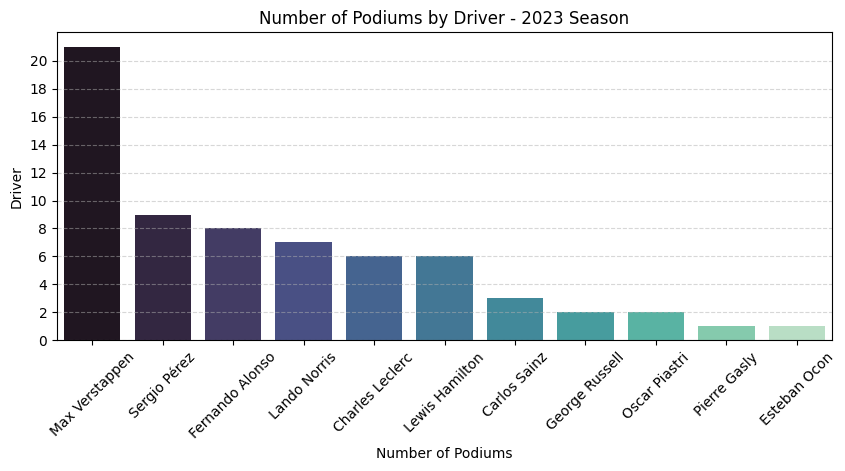

In [89]:
plt.figure(figsize=(10, 4))
sns.barplot(
    y='podiums', 
    x='Driver', 
    data=df_9, 
    palette='mako'
)
plt.xlabel('Number of Podiums')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 22, step=2))
plt.ylabel('Driver')
plt.title('Number of Podiums by Driver - 2023 Season')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Again, `Max Verstappen`dominance is shown having scored a podium in almost every race. Here `Carlos Sainz`is not that outstanding but `Fernando Alonso`or `Lando Norris`managed to be more consistent on the top of the field.

In [26]:
df_10 = pd.DataFrame(sql_query(query_10))
df_10.columns = ['Driver', 'total_positions_gained']

Query performed successfully.
Database connection closed.


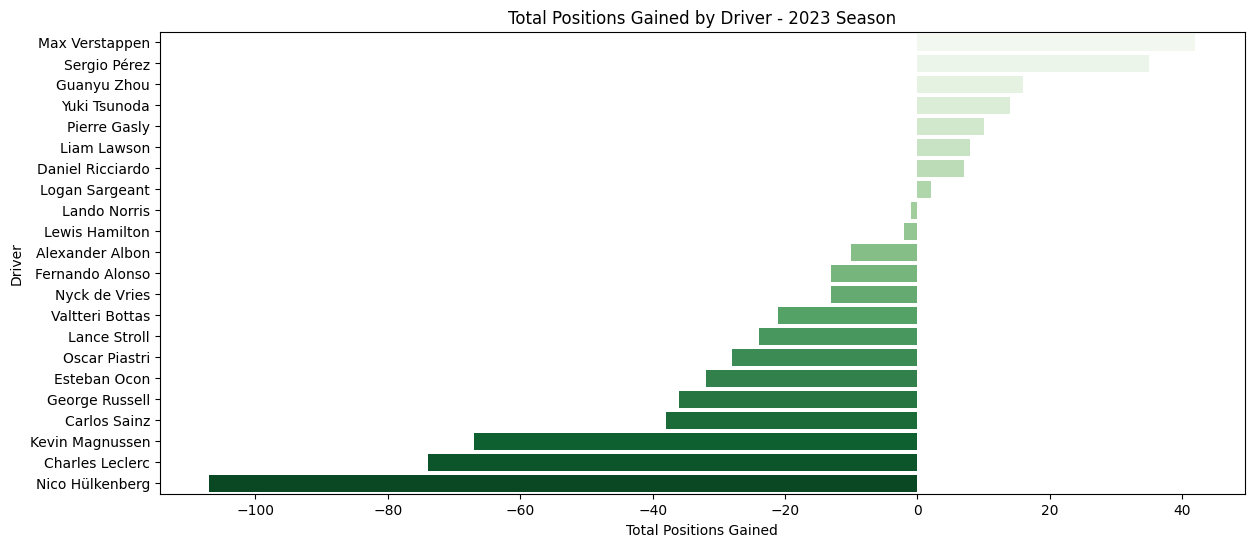

In [27]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x='total_positions_gained', 
    y='Driver', 
    data=df_10, 
    palette='Greens'
)
plt.xlabel('Total Positions Gained')
plt.ylabel('Driver')
plt.title('Total Positions Gained by Driver - 2023 Season')
plt.show()


In [29]:
df_11 = pd.DataFrame(sql_query(query_11))
df_11.columns = ['Driver', 'delta_pos', 'occurrences']

Query performed successfully.
Database connection closed.


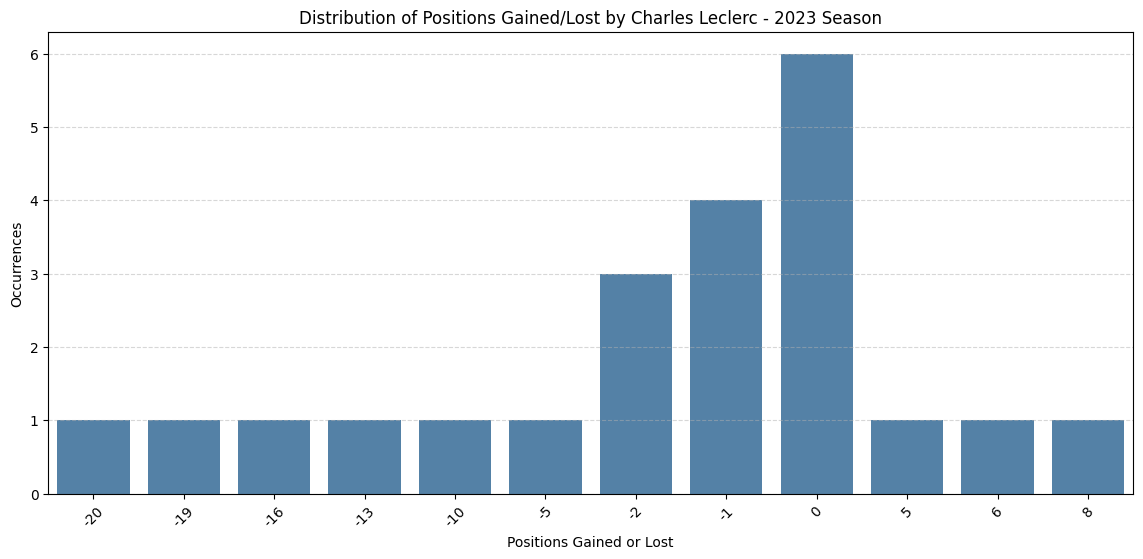

In [30]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x='delta_pos', 
    y='occurrences', 
    data=df_11, 
    color='steelblue'
)
plt.xlabel('Positions Gained or Lost')
plt.ylabel('Occurrences')
plt.title('Distribution of Positions Gained/Lost by Charles Leclerc - 2023 Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [31]:
df_12 = pd.DataFrame(sql_query(query_12))
df_12.columns = ['Driver', 'delta_pos', 'occurrences']

Query performed successfully.
Database connection closed.


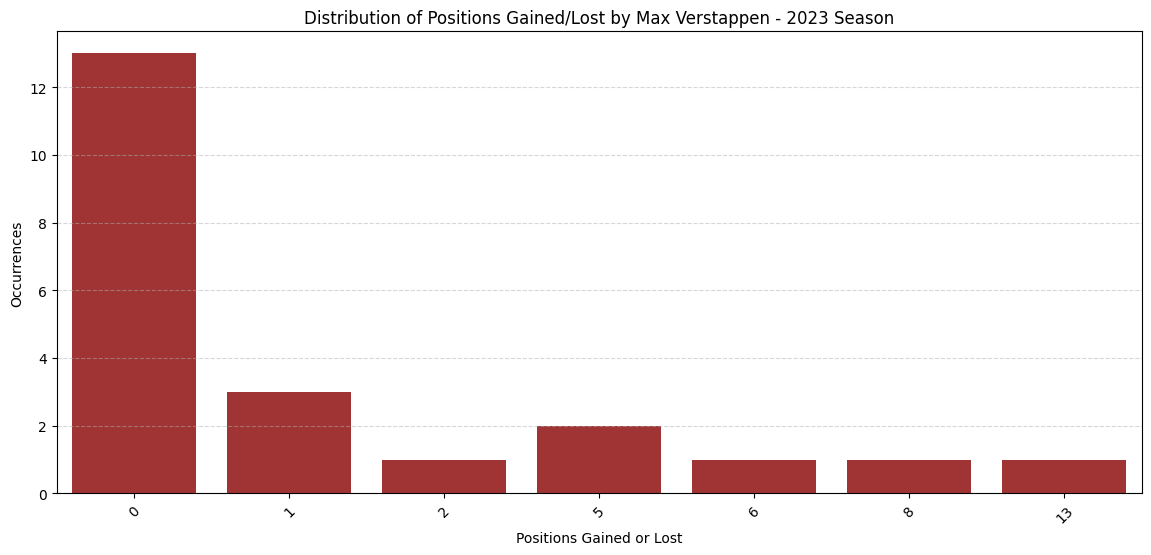

In [32]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x='delta_pos', 
    y='occurrences', 
    data=df_12, 
    color='firebrick'
)
plt.xlabel('Positions Gained or Lost')
plt.ylabel('Occurrences')
plt.title('Distribution of Positions Gained/Lost by Max Verstappen - 2023 Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [33]:
df_13 = pd.DataFrame(sql_query(query_13))
df_13.columns = ['Driver', 'Race Name', 'End Position']

Query performed successfully.
Database connection closed.


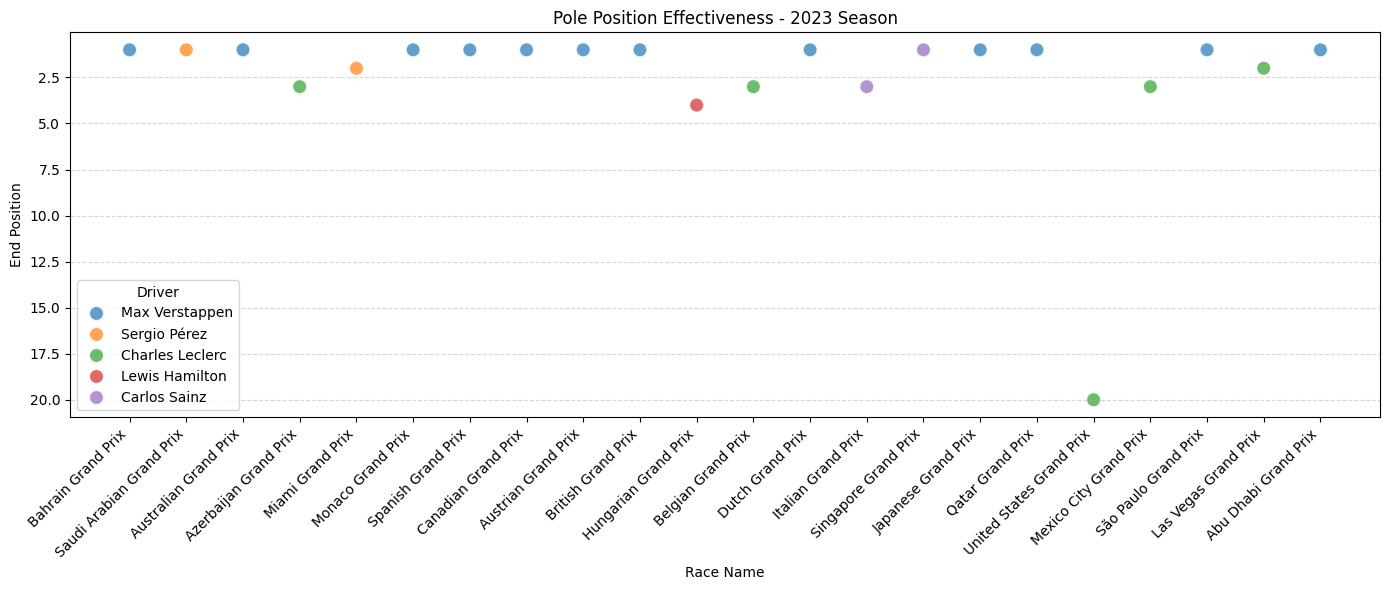

In [34]:
plt.figure(figsize=(14, 6))
sns.scatterplot(
    x='Race Name', 
    y='End Position', 
    hue='Driver', 
    data=df_13, 
    palette='tab10', 
    s=100, 
    alpha=0.7
)
plt.xlabel('Race Name')
plt.ylabel('End Position')
plt.title('Pole Position Effectiveness - 2023 Season')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la posición 1 esté en la parte superior
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [35]:
df_14 = pd.DataFrame(sql_query(query_14))
df_14.columns = ['Round', 'Driver', 'Cumulative Points']

Query performed successfully.
Database connection closed.


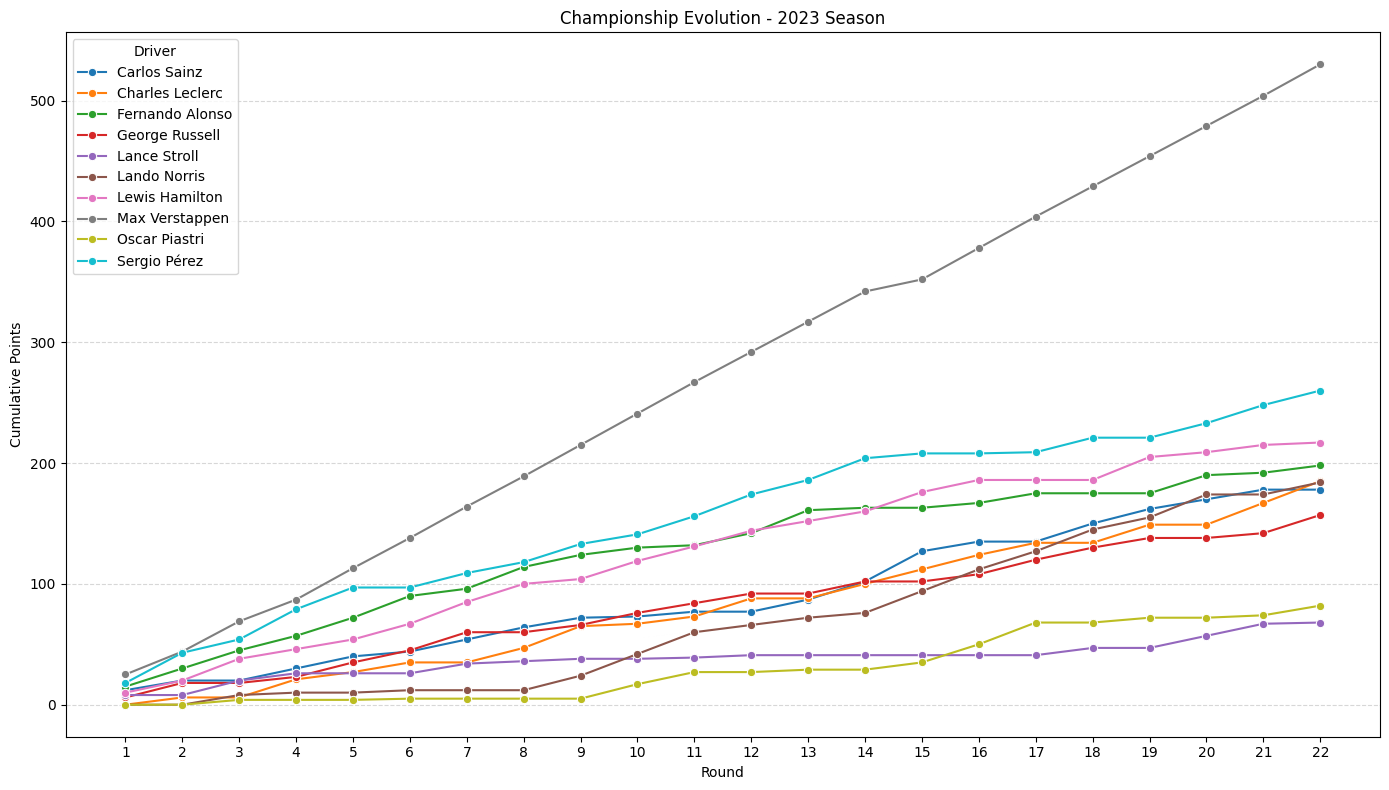

In [37]:
# Filter the 10 drivers with most points
top_drivers = df_14.groupby('Driver')['Cumulative Points'].max().sort_values(ascending=False).head(10).index
df_top = df_14[df_14['Driver'].isin(top_drivers)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Round', 
    y='Cumulative Points', 
    hue='Driver', 
    data=df_top, 
    marker='o', 
    palette='tab10'
)
plt.xlabel('Round')
plt.ylabel('Cumulative Points')
plt.title('Championship Evolution - 2023 Season')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(df_14['Round'].unique())
plt.tight_layout()
plt.show()
